In [0]:
# importing libraries
import pandas as pd
from tqdm import tqdm
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [0]:
# reading the raw data 
raw_data = pd.read_excel('Retail_online_dataset.xlsx')

In [88]:
# top 5 elemets in the dataset
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
# length of the dataset
len(raw_data)

541909

In [49]:
# checking the dataset for missing value
raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [0]:
# removing the columns with empty values
raw_data = raw_data.dropna()

In [51]:
# length of raw data after dropping the null columns
len(raw_data)

406829

In [52]:
# checking the unique customers in the list
print(len(raw_data['CustomerID'].unique()))
unique_customers = raw_data['CustomerID'].unique()

4372


In [0]:
raw_data['StockCode'] = raw_data['StockCode'].astype(str)

In [0]:
# now taking some of the customers for train and others for test
unique_customers_train = unique_customers[:]

train = raw_data[raw_data['CustomerID'].isin(unique_customers_train)]

In [55]:
all_stock_code = []
for cust in tqdm(unique_customers_train):
  list_stock_code = train[train['CustomerID'] == cust]['StockCode'].tolist()
  all_stock_code.append(list_stock_code)




  0%|          | 0/4372 [00:00<?, ?it/s]


  1%|▏         | 63/4372 [00:00<00:06, 624.62it/s]


  3%|▎         | 129/4372 [00:00<00:06, 632.51it/s]


  4%|▍         | 182/4372 [00:00<00:07, 597.39it/s]


  6%|▌         | 252/4372 [00:00<00:06, 622.92it/s]


  7%|▋         | 315/4372 [00:00<00:06, 622.58it/s]


  9%|▊         | 380/4372 [00:00<00:06, 629.04it/s]


 10%|█         | 448/4372 [00:00<00:06, 643.31it/s]


 12%|█▏        | 515/4372 [00:00<00:05, 649.61it/s]


 13%|█▎        | 585/4372 [00:00<00:05, 662.28it/s]


 15%|█▍        | 650/4372 [00:01<00:05, 658.16it/s]


 16%|█▋        | 718/4372 [00:01<00:05, 663.28it/s]


 18%|█▊        | 784/4372 [00:01<00:05, 661.30it/s]


 19%|█▉        | 850/4372 [00:01<00:05, 659.99it/s]


 21%|██        | 920/4372 [00:01<00:05, 670.90it/s]


 23%|██▎       | 987/4372 [00:01<00:05, 669.00it/s]


 24%|██▍       | 1054/4372 [00:01<00:05, 660.11it/s]


 26%|██▌       | 1121/4372 [00:01<00:04, 660.98it/s]


 27%|██▋       | 1188/4372 [00:01<0

In [56]:
print(all_stock_code[:2])

[['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730', '22633', '22632', '22632', '22633', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '21730', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '21730', '22632', '22633', '85123A', '71053', '84406B', '15056BL', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '85123A', '71053', '84406B', '20679', '37370', '21871', '21071', '21068', '82483', '82486', '82482', '82494L', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '85123A', '71053', '82483', '82486', '82482', '82494L', '22411', '84029G', '84029E', '22752', '22803', '21730', '22632', '22633', '37370', '21871', '21071', '21068', '82483', '22411', '84029G', '84029E', '21730', '22

In [57]:
# building the model using Gensim Word2Vec
model = Word2Vec(size=100, window=5)
model.build_vocab(all_stock_code)
model.train(all_stock_code, total_examples = model.corpus_count, epochs = 50)

(20143873, 20341450)

In [84]:
# getting all the vector representation
vector_train = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
# using t-sne for dimesnionality reduction and plotting it in 2D plane
tsne = TSNE(n_components=2)
vector_train_tsne = tsne.fit_transform(vector_train)

In [0]:
df_plot = pd.DataFrame(vector_train_tsne, index=model.wv.vocab, columns=['X', 'Y'])

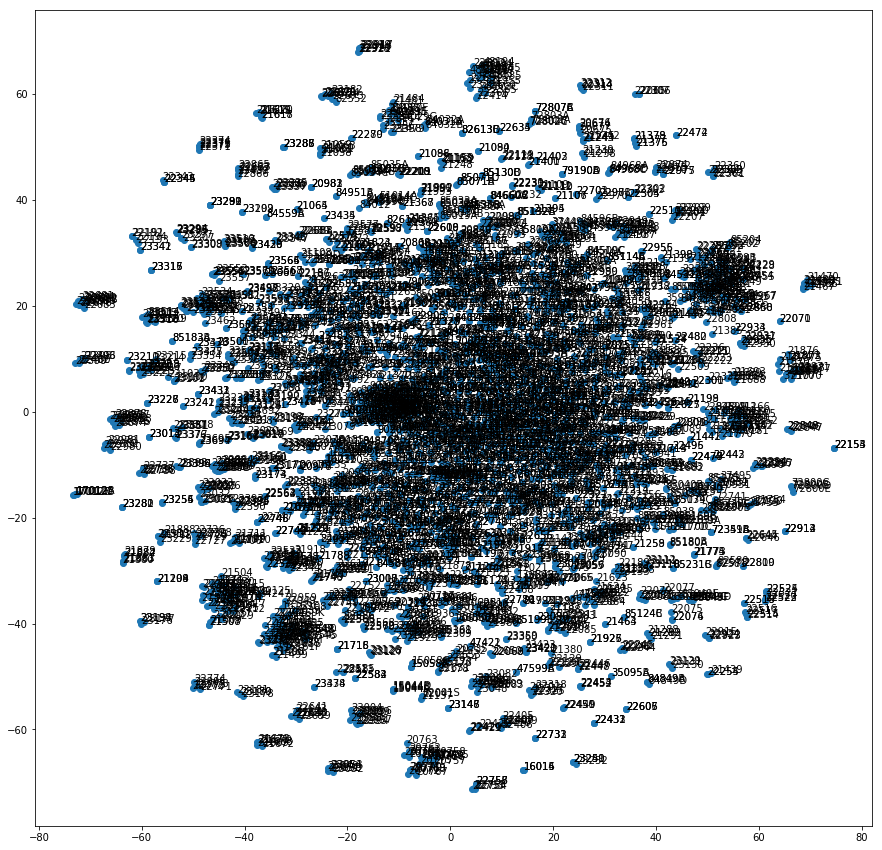

In [110]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_plot['X'], df_plot['Y'])

for word, pos in df_plot.iterrows():
    ax.annotate(word, pos)

In [111]:

# extract most similar products for the input vector
matching_products = model.similar_by_vector(model['37370'], topn = 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [113]:
print('The product is : ' , raw_data[raw_data['StockCode'] == '37370']['Description'].unique() ,'\n')
print('The recommended products are : ','\n')
for i in range(0,4,1):
  print(raw_data[raw_data['StockCode'] == matching_products[i][0]]['Description'].unique())

The product is :  ['RETRO COFFEE MUGS ASSORTED'] 

The recommended products are :  

['RETRO COFFEE MUGS ASSORTED']
['VINTAGE BILLBOARD TEA MUG']
['KINGS CHOICE MUG']
['VINTAGE RED TEATIME MUG']
